# Oil Futures

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Read in data

In [2]:
df = pd.read_csv(
    Path("../Resources/oil_futures.csv"), parse_dates=True, index_col="Date"
)

df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return
Date,,,,,,,,,
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0,0.318376
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0,-0.049588
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472


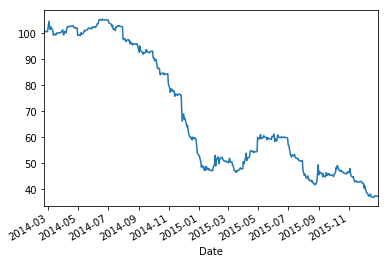

In [3]:
# More on settle prices: https://www.investopedia.com/terms/s/settlementprice.asp
df.Settle.plot()

### Calculate returns

In [5]:
# Create a column of the settle price returns
# YOUR CODE HERE!
Settlement = df[['Settle']]
Settlement

,Settle
Date,
2014-02-20,100.78
2014-02-21,100.61
2014-02-24,100.77
2014-02-25,100.57
2014-02-26,100.69
2014-02-27,100.67
2014-02-28,100.68
2014-03-03,104.69
2014-03-04,103.19


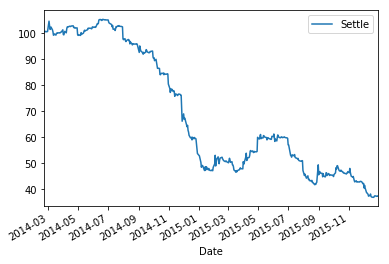

In [6]:
Settlement.plot()

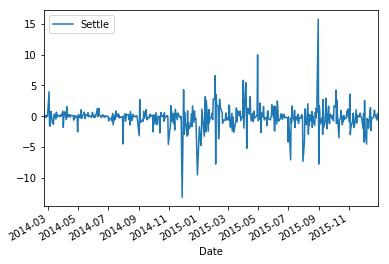

In [8]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns
# YOUR CODE HERE!
returns = Settlement.pct_change() * 100
returns.plot()

# Prepapre the Features (X) and the Target (y)

In [10]:
# Set the Dependent variable y to the `Return`
# YOUR CODE HERE!
df['Return'] = returns.copy()
df['Lagged Return'] = returns.shift()
df = df.dropna()
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return,Return,Lagged Return
Date,,,,,,,,,,,
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684,0.159030,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030,-0.198472,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472,0.119320,-0.198472
2014-02-27,100.67,100.67,100.67,100.67,0.02,100.67,0.0,12776.0,0.119320,-0.019863,0.119320
2014-02-28,100.68,100.68,100.68,100.68,0.01,100.68,0.0,12776.0,-0.019863,0.009933,-0.019863


In [13]:
# Select the `Lagged_Return` and assign the DataFrame to X
# YOUR CODE HERE!
y = df['Return']
x = df['Lagged Return'].to_frame()
x.head()

,Lagged Return
Date,
2014-02-24,-0.168684
2014-02-25,0.159030
2014-02-26,-0.198472
2014-02-27,0.119320
2014-02-28,-0.019863


In [14]:
# Access the weekofyear attribute from the index
# Create a new column with this called `Week_of_year`
# YOUR CODE HERE!
x['Week of Year'] = x.index.weekofyear
x.head()

,Lagged Return,Week of Year
Date,,
2014-02-24,-0.168684,9
2014-02-25,0.159030,9
2014-02-26,-0.198472,9
2014-02-27,0.119320,9
2014-02-28,-0.019863,9


### Get dummy variables for week and year

In [18]:
# Get a dummy variable for each week of the year
# YOUR CODE HERE!
X_binary_encoded = pd.get_dummies(x, columns=['Week_of_Year'])
X_binary_encoded.head()

KeyError: "None of [Index(['Week_of_Year'], dtype='object')] are in the [columns]"

In [10]:
X_binary_encoded.shape

(461, 54)

### Linear Regresion model

In [11]:
# Create a Linear Regression model and fit it to the data
# YOUR CODE HERE!

In [12]:
# Create predictions using the trained model and the `X_binary_encoded` data
# YOUR CODE HERE!

# List the first 10 predictions
# YOUR CODE HERE!

array([-0.09408009, -0.19278838, -0.08510803, -0.18082762, -0.13890543,
        0.22904997, -0.96762181,  0.66360517,  0.72241888,  0.19940254])

# Evaluating the Model

Evaluate the model using r2, mse, rmse

Compare the rmse to the standard deviation.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate r2_score (r-squared)
# YOUR CODE HERE!

r2: 0.20040272358975775


In [12]:
# Calculate mean squared error 
# Remember, a "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
# YOUR CODE HERE!

In [13]:
# Using mean squared error above, calculate root-mean-squared error (RMSE)
# YOUR CODE HERE!

In [14]:
# Print the r2, mser, rmse, and standard deviation
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(y)}")

R-squared (R2 ): 0.20040272358975775
Mean Squared Error (MSE): 2.9861924939839137
Root Mean Squared Error (RMSE): 1.7280603270672912
Standard Deviation of Futures Return: 1.9325166602824382
